In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as datetime
import sys

VALOR_CAMBIO_A_DOLAR = 19.54

In [4]:
df = pd.read_csv('train.csv', index_col='id', parse_dates=['fecha'])
pd.set_option('display.float_format', '{:.2f}'.format)

In [69]:
print(df.columns)
df.head()

Index(['titulo', 'descripcion', 'tipodepropiedad', 'direccion', 'ciudad',
       'provincia', 'antiguedad', 'habitaciones', 'garages', 'banos',
       'metroscubiertos', 'metrostotales', 'idzona', 'lat', 'lng', 'fecha',
       'gimnasio', 'usosmultiples', 'piscina', 'escuelascercanas',
       'centroscomercialescercanos', 'precio'],
      dtype='object')


,titulo,descripcion,tipodepropiedad,direccion,ciudad,provincia,antiguedad,habitaciones,garages,banos,...,idzona,lat,lng,fecha,gimnasio,usosmultiples,piscina,escuelascercanas,centroscomercialescercanos,precio
id,,,,,,,,,,,,,,,,,,,,,
254099,depto. tipo a-402,"depto. interior de 80.15m2, consta de sala com...",Apartamento,Avenida Division del Norte 2005,Benito Juárez,Distrito Federal,nan,2.00,1.00,2.00,...,23533.00,nan,nan,2015-08-23,0.00,0.00,0.00,0.00,0.00,2273000.00
53461,condominio horizontal en venta,"<p>entre sonora y guerrero, atr&aacute;s del h...",Casa en condominio,AV. MEXICO,La Magdalena Contreras,Distrito Federal,10.00,3.00,2.00,2.00,...,24514.00,19.31,-99.23,2013-06-28,0.00,0.00,0.00,1.00,1.00,3600000.00
247984,casa en venta urbi 3 recamaras tonala,descripcion \nla mejor ubicacion residencial e...,Casa,Urbi Tonala,Tonalá,Jalisco,5.00,3.00,2.00,2.00,...,48551.00,nan,nan,2015-10-17,0.00,0.00,0.00,0.00,0.00,1200000.00
209067,casa sola en toluca zinacantepec con credito i...,casa en privada con caseta de vigilancia casas...,Casa,IGNACIO MANUEL ALTAMIRANO 128,Zinacantepec,Edo. de México,1.00,2.00,1.00,1.00,...,53666.00,19.30,-99.69,2012-03-09,0.00,0.00,0.00,1.00,1.00,650000.00
185997,paseos del sol,bonito departamento en excelentes condiciones ...,Apartamento,PASEOS DEL SOL,Zapopan,Jalisco,10.00,2.00,1.00,1.00,...,47835.00,nan,nan,2016-06-07,0.00,0.00,0.00,0.00,0.00,1150000.00


In [27]:
df[['gimnasio','garages','usosmultiples','piscina']].isnull().sum()
#Deberia asumir que los garages que no estan completos significa que esa casa no tiene?

gimnasio             0
garages          37765
usosmultiples        0
piscina              0
dtype: int64

In [34]:
df['escuelascercanas'].isnull().sum()

0

In [58]:
df.groupby('escuelascercanas').agg({'precio':'mean'})

,precio
escuelascercanas,
0.00,2528553.65
1.00,2533697.73


In [21]:
esculas_y_provincias_en_df = df[df.provincia=='Distrito Federal']
esculas_y_provincias_en_df = df[df.metrostotales==4]

esculas_y_provincias_en_df.groupby(['centroscomercialescercanos','escuelascercanas']).agg({'precio':'mean'})

precio
centroscomercialescercanos escuelascercanas           
0.00                       0.00             3431074.12
                           1.00             3185360.12
1.00                       0.00             4145987.48
                           1.00             3598037.94

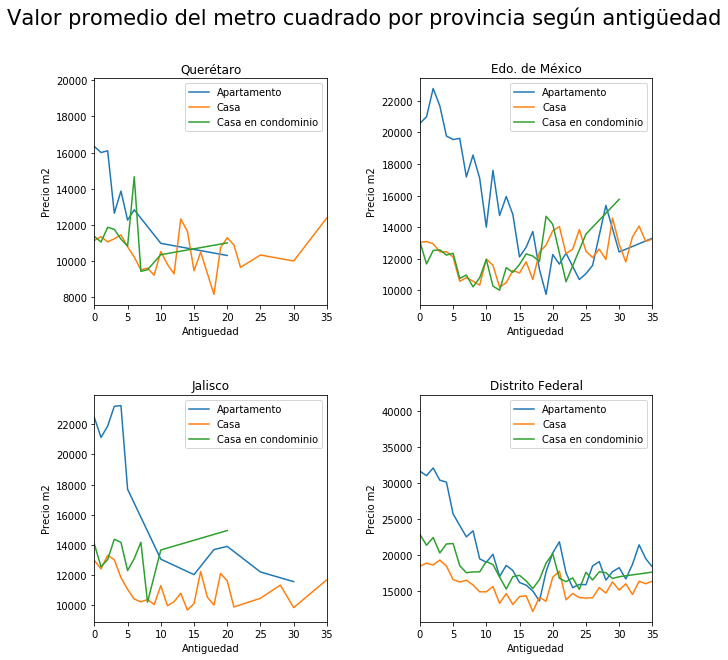

In [417]:
# Influye la antiguedad en el valor de las casas?
# Tomo datos agrupando por antiguedad, tipo de propiedad y provincia. 
# Filtro aquellos grupos donde la cantidad no es suficiente como para hacer un analisis consistente
# Armo un grafico para cada provincia, comparando los tipos de propiedad

df.groupby('provincia').size().sort_values(ascending=False)

df2 = df.copy()

df2['precio_m2'] = df2['precio']/df2['metroscubiertos']

df2 = df2.groupby(['antiguedad','tipodepropiedad','provincia']).filter(lambda x: len(x)>10).groupby(['antiguedad','tipodepropiedad','provincia']).agg({'precio_m2':'mean'})

df2 = df2.reset_index()

fig,(ax1,ax2) = plt.subplots(2,2, figsize=(10,10))

fig.subplots_adjust(hspace=0.4, wspace=0.4)
fig.suptitle('Valor promedio del metro cuadrado por provincia según antigüedad',fontsize=21)

for name in ['Apartamento','Casa','Casa en condominio']:
    ax1[0].plot(df2[(df2.tipodepropiedad==name) & (df2.provincia == 'Querétaro')].antiguedad,\
            df2[(df2.tipodepropiedad==name) & (df2.provincia == 'Querétaro')].precio_m2,\
            label=name)
    ax1[0].set_title('Querétaro')
    ax1[1].plot(df2[(df2.tipodepropiedad==name) & (df2.provincia == 'Edo. de México')].antiguedad,\
            df2[(df2.tipodepropiedad==name) & (df2.provincia == 'Edo. de México')].precio_m2,\
            label=name)
    ax1[1].set_title('Edo. de México')
    ax2[0].plot(df2[(df2.tipodepropiedad==name) & (df2.provincia == 'Jalisco')].antiguedad,\
            df2[(df2.tipodepropiedad==name) & (df2.provincia == 'Jalisco')].precio_m2,\
            label=name)
    ax2[0].set_title('Jalisco')
    ax2[1].plot(df2[(df2.tipodepropiedad==name) & (df2.provincia == 'Distrito Federal')].antiguedad,\
            df2[(df2.tipodepropiedad==name) & (df2.provincia == 'Distrito Federal')].precio_m2,\
            label=name)
    ax2[1].set_title('Distrito Federal')
    ax1[0].set_xlim([0,35])
    ax1[1].set_xlim([0,35])
    ax2[0].set_xlim([0,35])
    ax2[1].set_xlim([0,35])

    
ax1[0].set_xlabel("Antiguedad")
ax1[0].set_ylabel("Precio m2")
ax1[0].legend(loc='best')
ax1[1].set_xlabel("Antiguedad")
ax1[1].set_ylabel("Precio m2")
ax1[1].legend(loc='best')
ax2[0].set_xlabel("Antiguedad")
ax2[0].set_ylabel("Precio m2")
ax2[0].legend(loc='best')
ax2[1].set_xlabel("Antiguedad")
ax2[1].set_ylabel("Precio m2")
ax2[1].legend(loc='best')

In [223]:
df.groupby('habitaciones').mean()

,antiguedad,garages,banos,metroscubiertos,metrostotales,idzona,lat,lng,gimnasio,usosmultiples,piscina,escuelascercanas,centroscomercialescercanos,precio,precio_m2
habitaciones,,,,,,,,,,,,,,,
1.00,8.34,0.99,1.15,86.57,111.17,3721849.36,20.13,-98.64,0.12,0.08,0.12,0.39,0.37,1806074.64,23422.48
2.00,7.62,1.28,1.45,95.58,109.24,3407838.34,20.63,-99.73,0.07,0.05,0.08,0.46,0.42,1616899.96,16105.49
3.00,7.30,1.82,2.33,191.49,183.30,2091993.62,20.78,-99.51,0.07,0.06,0.10,0.47,0.41,2769606.78,13889.21
4.00,11.32,1.93,2.86,256.28,224.78,1802188.36,20.53,-99.30,0.06,0.06,0.09,0.48,0.42,3494388.63,12620.29
5.00,14.64,1.77,2.86,267.96,226.51,1783590.41,20.39,-99.41,0.04,0.05,0.05,0.48,0.41,3284971.94,11301.06
6.00,17.31,1.55,2.96,276.87,224.24,2129493.69,20.41,-99.26,0.02,0.03,0.03,0.46,0.37,3165558.67,10699.99
7.00,18.09,1.57,3.00,286.10,230.36,1280176.42,20.07,-99.51,0.03,0.02,0.01,0.47,0.39,3562563.99,11695.55
8.00,18.19,1.41,3.12,288.90,242.85,1735744.46,20.13,-98.86,0.02,0.02,0.03,0.47,0.40,3432464.06,10749.92
9.00,20.08,1.38,3.00,305.12,250.90,1280614.10,20.10,-97.68,0.01,0.03,0.01,0.45,0.39,3936173.91,11346.54


In [224]:
df.tipodepropiedad.value_counts()

Casa                             141717
Apartamento                       57341
Casa en condominio                19297
Terreno                            9945
Local Comercial                    3055
Oficina comercial                  1741
Bodega comercial                   1406
Edificio                           1396
Terreno comercial                  1326
Casa uso de suelo                   708
Quinta Vacacional                   395
Duplex                              343
Villa                               340
Inmuebles productivos urbanos       200
Rancho                              170
Local en centro comercial           165
Departamento Compartido             141
Otros                               134
Nave industrial                      76
Terreno industrial                   31
Huerta                               20
Lote                                  5
Garage                                1
Hospedaje                             1
Name: tipodepropiedad, dtype: int64

c:\users\gaston.parente\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
c:\users\gaston.parente\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


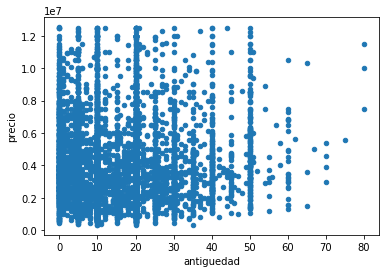

In [225]:
df.groupby('provincia').size().sort_values(ascending=False)
df2 = df[df['provincia']=='Distrito Federal']
df2 = df2[df['tipodepropiedad']=='Casa']
df2 = df2[df['habitaciones']==3]
#df2 = df2[df['']]
#df2 = df2[['precio','antiguedad']]

#Filtro los grupos para que solo me quede con aquellos que sean con mas de 10 casas para poder analizar de mejor forma.
#df_final = df2.groupby('antiguedad').filter(lambda x: len(x)>10).groupby('antiguedad').agg({'precio':'median'})
#df_final.plot()
df2.plot(kind='scatter', x='antiguedad', y='precio')

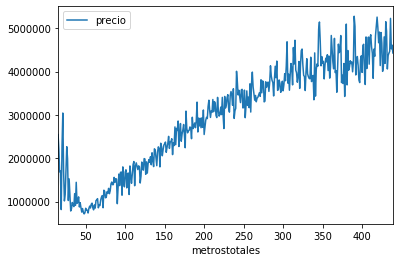

In [226]:


df.groupby('metrostotales').agg({'precio':'mean'}).plot()

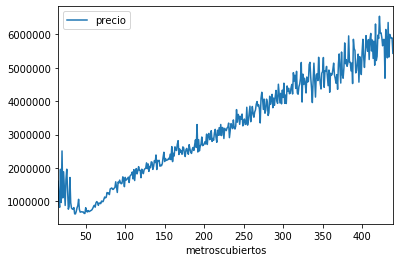

In [227]:
df.groupby('metroscubiertos').agg({'precio':'mean'}).plot()

In [228]:
df.descripcion.head()

id
254099    depto. interior de 80.15m2, consta de sala com...
53461     <p>entre sonora y guerrero, atr&aacute;s del h...
247984    descripcion \nla mejor ubicacion residencial e...
209067    casa en privada con caseta de vigilancia casas...
185997    bonito departamento en excelentes condiciones ...
Name: descripcion, dtype: object

In [302]:
# Valor de metro cuadrado por provincia y ciudad

df3 = df[df.piscina==0]
df3 = df[df.gimnasio==0]
df3 = df[df.antiguedad<5]



m2_x_zona = df3.groupby(['provincia','ciudad']).agg({'precio_m2':'mean'})

m2_x_zona 



precio_m2
provincia      ciudad                   
Aguascalientes Aguascalientes    9368.01
               Asientos         11616.69
               Cosío                 nan
               El Llano          8333.33
               Jesús María       8142.96
...                                  ...
Zacatecas      Guadalupe         8280.94
               Morelos           7184.75
               Río Grande        4457.36
               Villa de Cos      6325.30
               Zacatecas         7465.96

[640 rows x 1 columns]

In [335]:
df.groupby(['provincia']).size().sort_values()

provincia
Zacatecas                   94
Campeche                   263
Oaxaca                     711
Tlaxcala                   839
Tabasco                    994
Colima                    1008
Chiapas                   1126
Nayarit                   1352
Baja California Sur       1700
Aguascalientes            1753
Sinaloa                   1806
Durango                   2275
Tamaulipas                2303
Michoacán                 2471
Hidalgo                   2521
Guerrero                  2678
Guanajuato                2860
Sonora                    2988
Baja California Norte     3220
Coahuila                  3695
Chihuahua                 4590
Quintana Roo              4756
Veracruz                  5762
Morelos                   7337
Yucatán                   7928
San luis Potosí           8447
Puebla                   10421
Nuevo León               15324
Querétaro                16988
Jalisco                  21238
Edo. de México           41607
Distrito Federal         5879

In [412]:
df2 = df.copy()

df2['precio_m2'] = df2['precio']/df2['metroscubiertos']


#df3 = df2.groupby(['antiguedad']).filter(lambda x: len(x)>100).groupby(['antiguedad','tipodepropiedad','provincia']).agg({'precio_m2':'mean'})

df4 = df2.groupby(['antiguedad','tipodepropiedad','provincia']).filter(lambda x: len(x)>100)#.groupby(['antiguedad','tipodepropiedad','provincia']).agg({'precio_m2':'mean'})

df4.groupby('antiguedad').size()

antiguedad
0.00     46375
1.00     10247
2.00      2983
3.00      3635
4.00      6045
5.00     30727
6.00      1502
7.00       900
8.00      1243
9.00       403
10.00    26102
11.00      525
12.00      643
14.00      101
15.00     2458
16.00      235
18.00      410
20.00    17828
21.00      244
25.00     1318
28.00      101
30.00     1981
35.00      666
40.00      962
45.00      119
50.00      673
dtype: int64